In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords 
from collections import Counter
import os

C:\Users\Ming Xuan\AppData\Local\Temp\ipykernel_17148\2238641776.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def get_data(files):

    data_path = os.getcwd()+'/Data/'
    combined_df = pd.DataFrame(columns=['text', 'label'])
    df_columns = ['text', 'label']
    
    for x in files:

        df = pd.read_csv(data_path+x)
        df = df[df.columns[:2]]
        df.columns = df_columns
        df['text'] = df['text'].astype(str)

        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df

In [19]:
files = ['dataset1.csv', 'dataset2.csv', 'dataset3.csv', 'dataset4.csv']#, 'dataset5.csv']

data_df = get_data(files)
data_df

C:\Users\Ming Xuan\AppData\Local\Temp\ipykernel_17148\622898227.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([combined_df, df], ignore_index=True)


,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0
...,...,...
32511,"""Nothing beats the feeling of achieving someth...",0.0
32512,Too much homework Feeling Stressed!,1.0
32513,"overworked in school,, causes me headache",1.0
32514,How come my friends immediately get to know st...,0.0


In [20]:
data_df['label'].value_counts()

label
0.0    24406
1.0     8105
Name: count, dtype: int64

# Non-Depressive

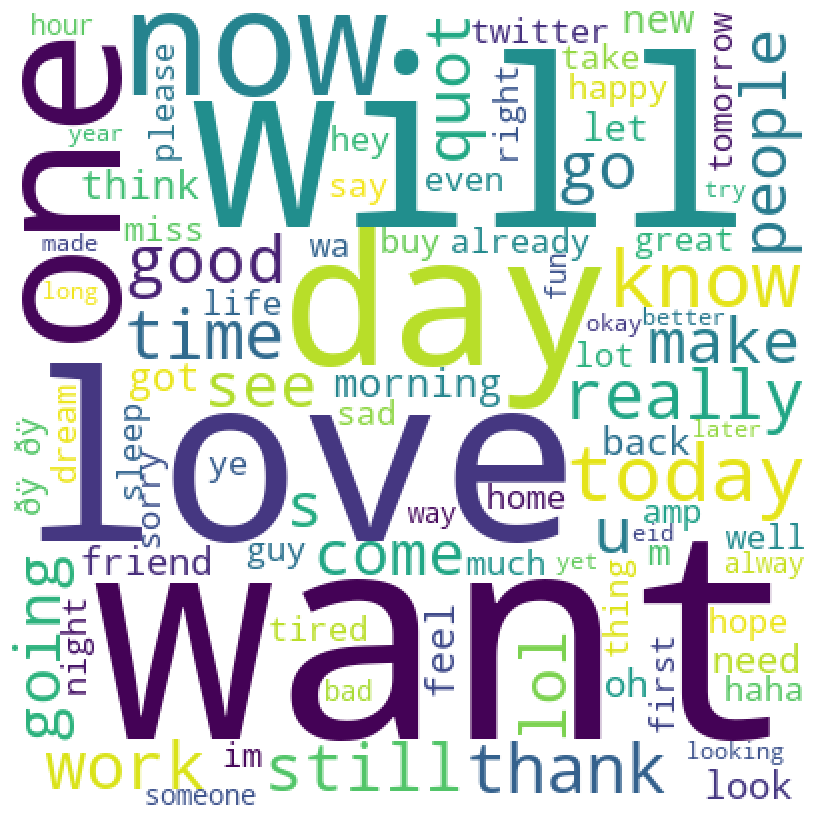

In [21]:
from wordcloud import WordCloud, STOPWORDS

non_depressive_df = data_df[data_df['label'] == 0]

comment_words = ''
stopwords = set(STOPWORDS)

for val in non_depressive_df['text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Depressive

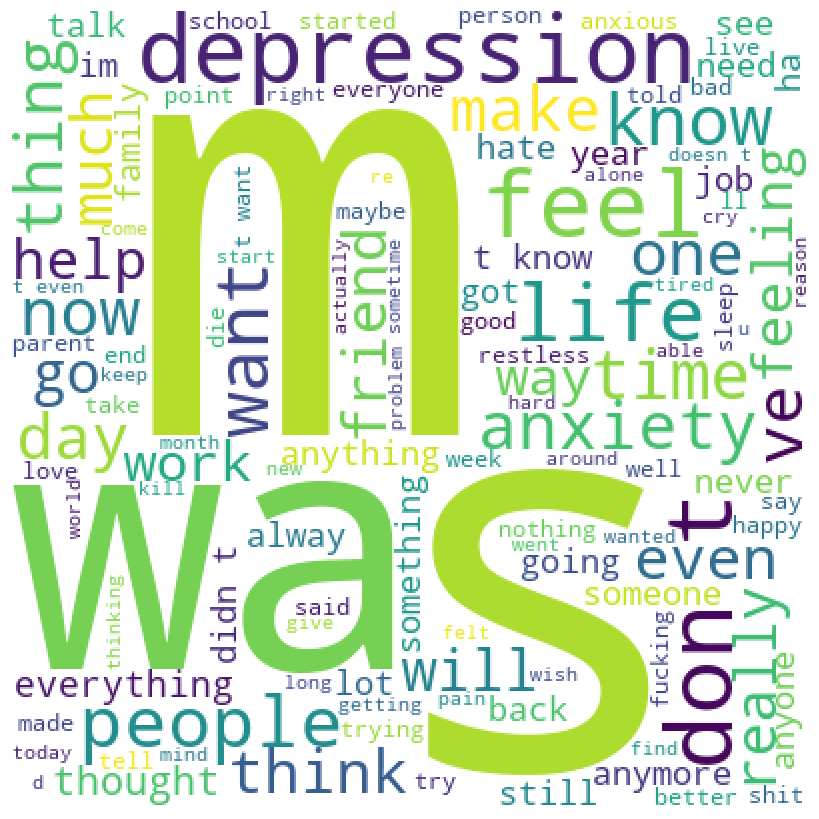

In [22]:
depressive_df = data_df[data_df['label'] == 1]

comment_words = ''
stopwords = set(STOPWORDS)

for val in depressive_df['text']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 400, height = 400,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [14]:
comment_words

'switchfoot http twitpic com y zl awww that s a bummer you shoulda got david carr of third day to do it d is upset that he can t update his facebook by texting it and might cry a a result school today also blah kenichan i dived many time for the ball managed to save 0 the rest go out of bound my whole body feel itchy and like it on fire nationwideclass no it s not behaving at all i m mad why am i here because i can t see you all over there kwesidei not the whole crew need a hug loltrish hey long time no see yes rain a bit only a bit lol i m fine thanks how s you tatiana k nope they didn t have it twittera que me muera spring break in plain city it s snowing i just re pierced my ear caregiving i couldn t bear to watch it and i thought the ua loss wa embarrassing octolinz it it count idk why i did either you never talk to me anymore smarrison i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown iamjazzyfizzle i wish i got to watch it with yo